# Standard Bank Tech Impact Challenge: Animal classification

The objective of this challenge is to create a machine learning model to accurately predict the likelihood that an image contains a zebra, as opposed to an elephant. While this may be an easy task for humans, elephants, and zebras, your computer will find it a bit more difficult.

The total dataset contains 13,999 images of zebras and elephants, sampled from the Snapshot Serengeti collection of more than 6 million animals.

Your task is to predict whether a given image contains a zebra or elephant. For each unique image ID in the test set you should estimate the likelihood that the image contains a zebra or elephant, with an estimated probability value between 0 and 1. A value of 1 represents a zebra and 0 represents an elephant. These images do not contain both simultaneously. It is therefore only a binary classification task.

# The dataset
You are given 13,999 photos each with a unique identifier. The data is given in jpeg format. Each photo has already been resized to 330x330 pixels.

<br>

### The dataset is structured as follows:
 - ID 0 - 6,999 are all elephants.
 - ID 7,000 - 13,999 are zebras.
 
<br>

### Training set (size: 10,000):
 - ID 0 - 5,000 as well as 
 - ID 7,000 - 12,000

### Validation set (size: 2,000):
 - ID 5,000 - 5,999 as well as 
 - ID 12,000 - 12,999

### Test set (size: 2,000):
 - ID 6,000 - 6,999 as well as 
 - ID 13,000 - 13,999

<br>
The data has already been divided into the respective folders. You must write code to load the data in accordingly.


# Marking Criteria

There are multiple ways one can tackle the problem. It is up to you to decide and motivate your decisions. You are not limited to using any specific methods or models.

Motivate all of your steps taken in completing the task at hand, this includes but is not limited to:
- Exploring the data
- Data augmentation
- Preprocessing the data
- Choosing the right machine learning model(s)
- Tuning the model(s)
- Performance assessment of the model(s)

Make sure to add your thoughts and motivations behind your decision making as well as the outcome thereof in markdown cells.

**Your commentary will be more valuable than the performance of the model itself.**

Remeber to label all graphs and keep your notebook neat.

# Make sure to include an Accuracy score of you final model on the test set.
You may choose any other additional criteria you want to evaluate you final model on.

**----------------------------------------------------------------------------------------------------------------------------------------------------------------**

**----------------------------------------------------------------------------------------------------------------------------------------------------------------**

# **Zebra or Elephant Classification Project**

All necessary imports

In [177]:
import numpy as np
import matplotlib.pyplot as plt
import os
import random
import cv2


Create sets of all the images

In [178]:
category_train_dir_labels = ['Elephant_train', 'Zebra_train']
category_valid_dir_labels = ['Elephant_valid', 'Zebra_valid']
category_test_dir_labels = ['Elephant_test', 'Zebra_test']

train_directory =r'data/train/'
valid_directory =r'data/valid/'
test_directory =r'data/test/'

labels = ['elephant','zebra']
# x = cv2.resize(cv2.imread("data/train/Elephant_train/IMG0_elephant"),(330,330))
# plt.imshow(x)

train_data = []

for category_label in category_train_dir_labels:
    folder = os.path.join(train_directory,category_label)
    label=category_train_dir_labels.index(category_label)
    
    for img in os.listdir(folder):
         img_path=os.path.join(folder,img)
         img_arr =cv2.resize(cv2.imread(img_path),(330,330))
         
         train_data.append([img_arr,label])




Create Validation set

In [179]:
valid_data = []
for category_label in category_valid_dir_labels:
    folder = os.path.join(valid_directory,category_label)
    label=category_valid_dir_labels.index(category_label)
    
    for img in os.listdir(folder):
         img_path=os.path.join(folder,img)
         img_arr =cv2.resize(cv2.imread(img_path),(330,330))
         
         valid_data.append([img_arr,label])

Create Test set

In [180]:
test_data = []
for category_label in category_test_dir_labels:
    folder = os.path.join(test_directory,category_label)
    label=category_test_dir_labels.index(category_label)
    
    for img in os.listdir(folder):
         img_path=os.path.join(folder,img)
         img_arr =cv2.resize(cv2.imread(img_path),(330,330))
         
         test_data.append([img_arr,label])

test_data

[[array([[[231, 207, 177],
          [231, 207, 177],
          [231, 207, 177],
          ...,
          [102, 106,  81],
          [104, 107,  81],
          [129, 133, 104]],
  
         [[231, 207, 177],
          [231, 207, 177],
          [232, 208, 178],
          ...,
          [124, 127, 102],
          [106, 109,  83],
          [121, 125,  96]],
  
         [[232, 208, 178],
          [232, 208, 178],
          [232, 208, 178],
          ...,
          [ 97,  98,  72],
          [115, 117,  88],
          [122, 124,  95]],
  
         ...,
  
         [[ 13,  47,  53],
          [ 14,  49,  53],
          [  0,  18,  23],
          ...,
          [  0,  19,  23],
          [  0,  40,  43],
          [  9,  50,  53]],
  
         [[ 19,  52,  61],
          [ 13,  47,  53],
          [  0,  31,  37],
          ...,
          [ 18,  60,  65],
          [ 33,  78,  82],
          [ 37,  84,  88]],
  
         [[ 18,  51,  60],
          [ 15,  48,  57],
          [  4,  33,  40

Shuffle the sets so that they are in random order

In [181]:
random.seed(2022)
random.shuffle(train_data)
random.shuffle(test_data)
random.shuffle(valid_data)


In [182]:
X_train = []
y_train = []
for feature, label in train_data:
    X_train.append(feature)
    y_train.append(label)

X_valid = []
y_valid = []
for feature, label in valid_data:
    X_valid.append(feature)
    y_valid.append(label)

X_test = []
y_test = []
for feature, label in test_data:
    X_test.append(feature)
    y_test.append(label)

X_train = np.array(X_train)
y_train = np.array(y_train)

X_valid = np.array(X_valid)
y_valid = np.array(y_valid)

X_test = np.array(X_test)
y_test = np.array(y_test)


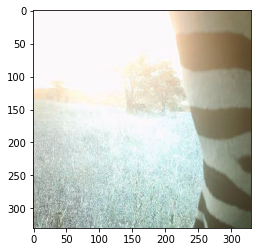

9999

In [196]:
plt.imshow(X_train[9001])
plt.show()
len(X_train)